<a href="https://colab.research.google.com/github/Aayush6377/Machine-Learning-Lab-programs-Sem-6/blob/main/Lab_14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Using Random Forest Regression predict house on Boston dataset**

In [1]:
#Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
#Load the Dataset
df=pd.read_csv('/content/boston.csv')
print(df.iloc[:,:5])

        CRIM    ZN  INDUS  CHAS    NOX
0    0.00632  18.0   2.31     0  0.538
1    0.02731   0.0   7.07     0  0.469
2    0.02729   0.0   7.07     0  0.469
3    0.03237   0.0   2.18     0  0.458
4    0.06905   0.0   2.18     0  0.458
..       ...   ...    ...   ...    ...
501  0.06263   0.0  11.93     0  0.573
502  0.04527   0.0  11.93     0  0.573
503  0.06076   0.0  11.93     0  0.573
504  0.10959   0.0  11.93     0  0.573
505  0.04741   0.0  11.93     0  0.573

[506 rows x 5 columns]


In [7]:
#Split the Data
x = df.drop('Price', axis=1)
y = df['Price']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print("x train:\n",x_train.iloc[:5,:5])
print("x test:\n",x_test.iloc[:5,:5])
print("y train:\n",y_train.head())
print("y test:\n",y_test.head())

x train:
          CRIM    ZN  INDUS  CHAS     NOX
477  15.02340   0.0  18.10     0  0.6140
15    0.62739   0.0   8.14     0  0.5380
332   0.03466  35.0   6.06     0  0.4379
423   7.05042   0.0  18.10     0  0.6140
19    0.72580   0.0   8.14     0  0.5380
x test:
         CRIM    ZN  INDUS  CHAS    NOX
173  0.09178   0.0   4.05     0  0.510
274  0.05644  40.0   6.41     1  0.447
491  0.10574   0.0  27.74     0  0.609
72   0.09164   0.0  10.81     0  0.413
452  5.09017   0.0  18.10     0  0.713
y train:
 477    12.0
15     19.9
332    19.4
423    13.4
19     18.2
Name: Price, dtype: float64
y test:
 173    23.6
274    32.4
491    13.6
72     22.8
452    16.1
Name: Price, dtype: float64


In [9]:
#Train the Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

In [12]:
#Predicting values
y_pred=model.predict(x_test)
print("y_test: ",np.array(y_test)[:10])
print("y_pred: ",y_pred[:10])

y_test:  [23.6 32.4 13.6 22.8 16.1 20.  17.8 14.  19.6 16.8]
y_pred:  [22.839 30.676 16.317 23.51  16.819 21.374 19.358 15.62  21.091 21.073]


In [13]:
#Evaluate the Model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", round(mse, 2))
print("R² Score:", round(r2, 2))

Mean Squared Error: 7.9
R² Score: 0.89


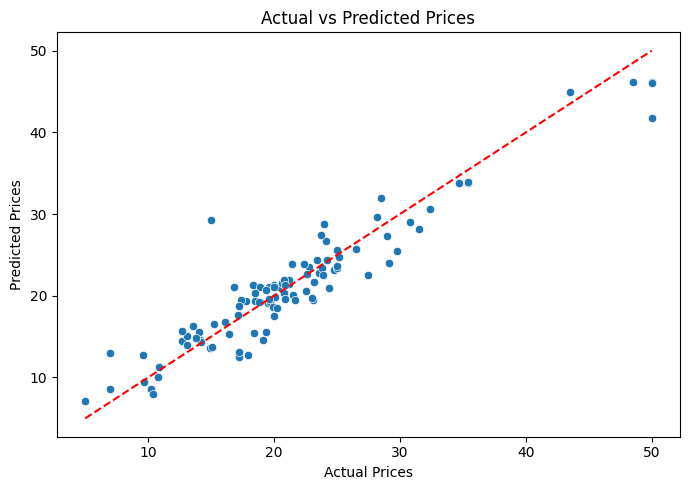

In [14]:
#Actual vs Predicted Plot
plt.figure(figsize=(7,5))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')  # perfect line
plt.tight_layout()
plt.show()

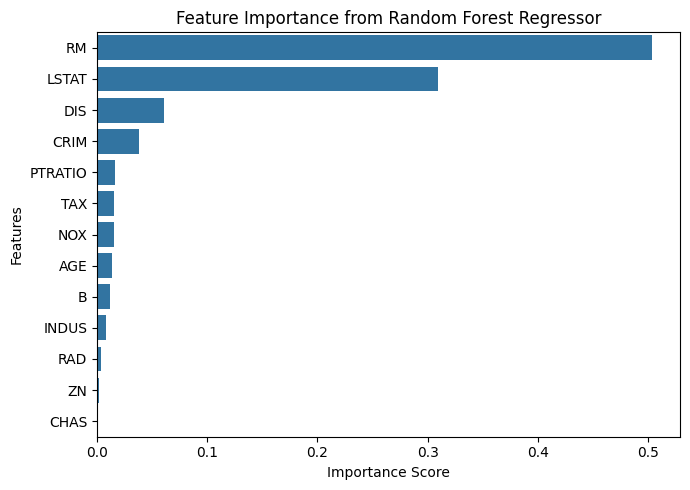

In [16]:
#Feature Importance
feature_importances = pd.Series(model.feature_importances_, index=x.columns).sort_values(ascending=False)

plt.figure(figsize=(7,5))
sns.barplot(x=feature_importances, y=feature_importances.index)
plt.title("Feature Importance from Random Forest Regressor")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()
